# Project 1: Competition between diffusion and fragmentation

> The expectation for a project is that is reads like a paper or report.  See "Appendix 1A: Laboratory reports" of the textbook for some guidance of the sections that are expected.  In particular, it is not necessary to answer questions as 'part a), part b), etc.' like you would do for an assignment.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

As we have discussed, random walks are useful for understanding diffusion in contexts more general than the movement of a particle. Consider a particle in solution whose mass can grow either by the absorption of particles or shrink by the loss of small particles, including fragmentation. We can model this process as a random walk by replacing the position of the particle by its mass. One difference between this case and the random walks we have studied so far is that the random variable, the mass, must be positive. The model of Ferkinghoff-Berg et al. can be summarized as follows:

(i) Begin with $N$ objects with some distribution of lengths. Let the integer $L_i$ represent the length of the $i$th object.

(ii) All the objects change their length by ±1.  This step is analogous to a random walk.  If the length of an object becomes equal to 0, it is removed from the system. An easy way toeliminate the $i$th object is to set its length equal to the length of the last object and reduce $N$ by unity.

(iii) Choose one object at random with a probability that is proportional to the length of the object. Fragment this object into two objects, where the fraction of the mass going to each object is random.

(iv) Repeat steps (ii) and (iii).

## a. 

Write a program to implement this algorithm in one dimension.

> We need a data structure to hold the object lengths.  You could use either python lists or NumPy array. One tricky bit to figure out is how to add to the total number of objects.

In [390]:
# If you are using lists then
L = [1,2,3,4,5]
L

[1, 2, 3, 4, 5]

In [391]:
# add new objects to end
L.append(99)
L

[1, 2, 3, 4, 5, 99]

In [392]:
# for NumPy arrays
L = np.array([1,2,3,4,5])
L

array([1, 2, 3, 4, 5])

In [393]:
# add a new element to the end
L = np.hstack( [L, 99])
L

array([ 1,  2,  3,  4,  5, 99])

> I'd recommend figuring out how to grow your data structure dynamically as is needed. Don't just create an initially 'very large' array and assume it will be big enough.

The main quantity of interest is the distribution of lengths $P(L)$. Explore a variety of initial length distributions with a total mass of 5000 for which the distribution is peaked at about 20 mass units. Is the long time behavior of $P(L)$ similar in shape for any initial distribution? Compute the total mass (sum of the lengths) and output this value periodically. Although the total mass will fluctuate, it should remain approximately constant. Why?

> To visualize $P(L)$ I think creating a histogram is easiest.

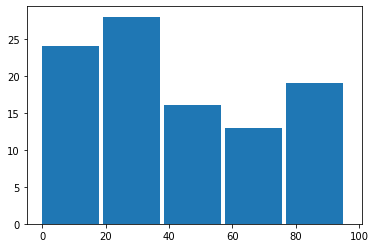

In [419]:
L = np.random.randint(0, 100, size=100)
plt.hist(L, bins=5, width=18)
plt.show()

> When needed, `np.histogram` will give you the raw data in terms of bins and counts

In [420]:
np.histogram(L, bins=5)

(array([24, 28, 16, 13, 19]), array([ 0. , 19.2, 38.4, 57.6, 76.8, 96. ]))

## b.

Collect data for three different initial distributions with the same number of objects $N$, and scale $P(L)$ and $L$ so that the three distributions roughly fall on the same curve. For example,you can scale $P(L)$ so that the maximum of the three distributions has the same value. Then multiply each value of $L$ by a factor so that the distributions overlap


> To create an initial distribution, check out `np.random` which has many standard distributions. Convert the array of floats into an array of integers.

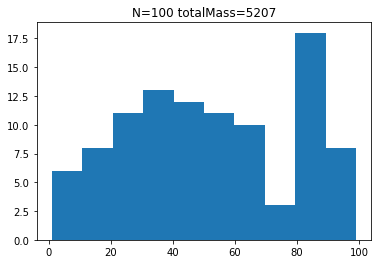

In [456]:
N = 100
M = 5000

L = np.random.uniform(2*M/N, size=N)

L = np.array(L, dtype=np.int)

totalMass = L.sum()

plt.hist(L)
plt.title(f'N={N} totalMass={totalMass}')
plt.show()


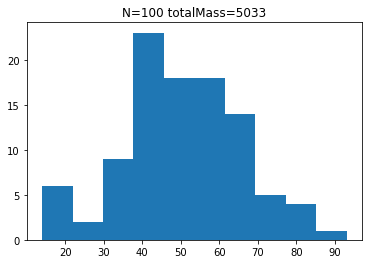

In [482]:
N = 100
M = 5000

L = np.random.normal(M/N, 15, size=N)

L = np.array(L, dtype=np.int)

totalMass = L.sum()

plt.hist(L)
plt.title(f'N={N} totalMass={totalMass}')
plt.show()

> Or create initial distributions explicitly according to analytic distribution.

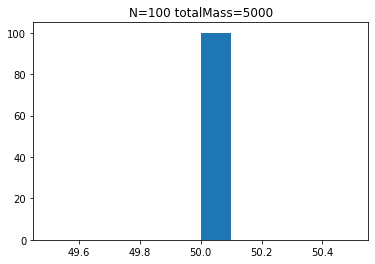

In [483]:
N = 100
M = 5000

L = np.ones(N) * M/N

L = np.array(L, dtype=np.int)

totalMass = L.sum()

plt.hist(L)
plt.title(f'N={N} totalMass={totalMass}')
plt.show()

## c.

The analytical results suggest that the universal behavior can be obtained by scaling $L$ by the total mass raised to the 1/3 power. Is this prediction consistent with your results? Test this hypothesis by adjusting the initial distributions so that they all have the same total mass. Your results for the long time behavior of $P(L)$ should fall on a universal curve. Why is this universality interesting? How can this result be used to analyze different systems? Would you need to do a new simulation for each value of L?

> Looking up the reference given for this project might be useful: Jesper Ferkinghoff-Borg, Mogens H. Jensen, Joachim Mathiesen, Poul Olesen, and Kim Sneppen, “Competition between diffusion and fragmentation: An important evolutionary process of nature,” Phys. Rev. Lett.91, 266103 (2003). The results of the model were compared withexperimental data on ice crystal sizes and the length distribution of α helices in proteins.

## d. 

What happens if step (iii) is done more or less often than each random change of length. Does the scaling change?